### Hello! 
This is a Project to Predict House Prices using the Housing Price Prediction Dataset on the Kaggle website.
Being able to predict the prices of houses is going to be a big deal in the real estate sector as prices of houses can flunctuate a lot as a result of a number of factors
and I also worked with a real estate firm for about a year, so I know how important a project like this would be able to help with real world problems 

The dataset I will be using for this project is gong to be the Kaggle Housing pricing data and it can be found by clicking on this [LINK](https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/data)

This dataset provides comprehensive information for house price prediction, with 13 column names:

1.Price: The price of the house.

2.Area: The total area of the house in square feet.

3.Bedrooms: The number of bedrooms in the house.

4.Bathrooms: The number of bathrooms in the house.

5.Stories: The number of stories in the house.

6.Mainroad: Whether the house is connected to the main road (Yes/No).

7.Guestroom: Whether the house has a guest room (Yes/No).

8.Basement: Whether the house has a basement (Yes/No).

9.Hot water heating: Whether the house has a hot water heating system (Yes/No).

10.Airconditioning: Whether the house has an air conditioning system (Yes/No).

11.Parking: The number of parking spaces available within the house.

12.Prefarea: Whether the house is located in a preferred area (Yes/No).

13.Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

# Step 1 

Import the libraries needed for this project 
I will be using 
1. Pandas library: Pandas is used for data manipulation and analysis.
2. Numpy Library: Numpy is a fundamental library for numerical computing.
3. Matplotlib library: Matplotlib is a plotting library used for creating static, animated, and interactive visualizations.
4. Seaborn: Seaborn is built on top of Matplotlib and provides a high-level interface for creating more attractive and informative statistical graphics.
5. SciKit Learn : SciKit Learn is a machine learning library that provides simple and efficient tools for data mining and data analysis.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression ,Ridge #I will be using Linear regression for this project ,and Ridge for model Improvement if need be
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error  #For Model evaluation 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  #Polynomial Features for model improvement and standard scaler for scaling if need be! 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

## Step 2 
Load The dataset and explore it.

In [2]:
df = pd.read_csv('Housing.csv',header=0) #usually Pandas assume the first row to be the header, but here is an alternative way of using the first row as header

In [3]:
df.head() #Load the first 5 entries in the dataset 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#time for a few basic analysis 
df.shape

(545, 13)

In [5]:
df.describe(include='all') #The default for the describe() function with pandas only includes the numerical variables , thus the " include='all' " parameter

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


First few observations:
1. There are 545 rows and 13 columns in the dataset.
2. The average price of houses in the dataset is 4,766,729 and the highest value of price is 13,300,000 
3. The average area used is 5150.541 square feet and maximum value is 16,200 square feet.
4. Most houses has betwwen 2-3 bedrooms as the average is 2.965.
5. Most houses have bathrooms between 1-2 and also 1-2 stories.
6. Most houses were connected to the main road, Most of the houses did not have guest rooms and Most of the houses did not have basements.
7. Most of the houses did not have air condiotioning and water heater
8. Most of the house owners did not get houses in their prefered areas.
9. 41 percent of the houses were semi-furnished.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


The Dataset has the appropriate data types

Check for missing values and handle them  

In [7]:
missing_values = df.isna().sum()
print("The missing values per column;\n" ,missing_values)

The missing values per column;
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


The dataset is clean and there are no missing values.

## Step 3 

Exploratory Data Analysis (EDA)
Uni-variate and Bi-Variate analysis

##### 3.1 UNiVARIATE ANALYSIS 


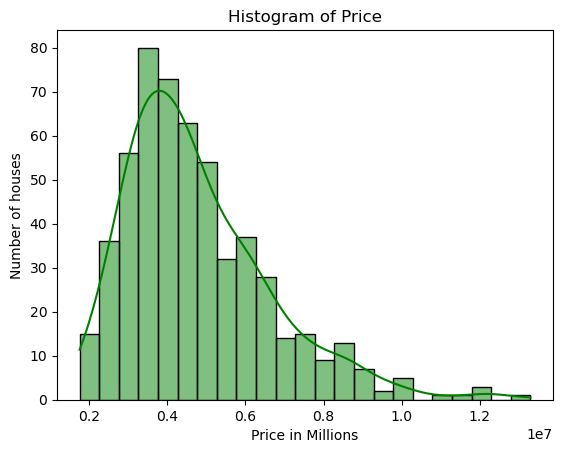

In [8]:
#I will be using a Histtogram for Price and Area 
#I will be using barplot for the other variables 

sns.histplot(x='price',data=df,bins=23,kde=True,color='green')#I am using the square root rule for choosing number of bins
plt.title("Histogram of Price")
plt.xlabel("Price in Millions")
plt.ylabel("Number of houses")
plt.show()

From analyzing the the histogram , I can see that it shows the prices are skewed to the right which can mean that most of the entries are low priced houses.
Most of the houses are priced between 2 to 6 million as I can see there is a significant drop off around the 8 million mark. there are also have a few houses that are more expensive than 10 million which can indicate there are outliers in the dataset , I will be confirming by using a boxplot below.

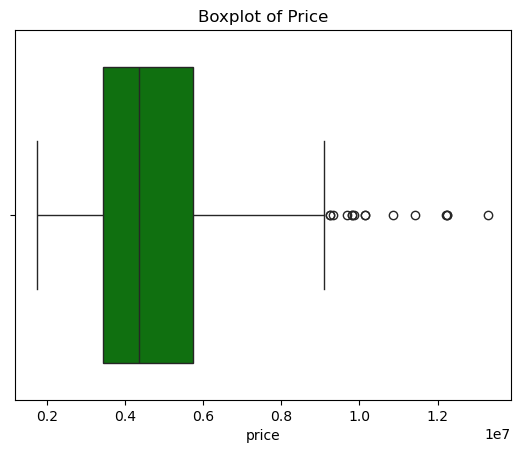

In [9]:
sns.boxplot(x='price',data=df,color='green')
plt.title("Boxplot of Price")
plt.show()

I can see there is a reasonable amount of outliers.
I can also see the the Median point is around 4.3 million.
The plot also shows that there is about 50 percent of the houses with prices between 3.4 million to 5.7 million and that is the Inter-Quartile Range as shown by the green box

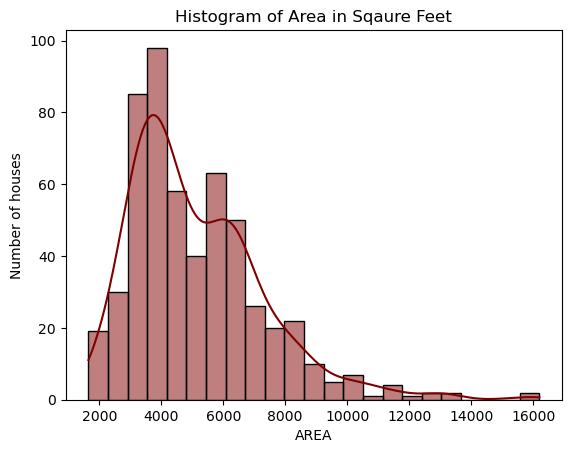

In [10]:
#For Area

sns.histplot(x='area',data=df,bins=23,kde=True,color='maroon')
plt.title("Histogram of Area in Sqaure Feet")
plt.xlabel("AREA")
plt.ylabel("Number of houses")
plt.show()

I can see it is also a right skewed column, Most of the houses use between 2000 to 6000 square feet and there are also potential outliers in the entries which I will confirm using boxplots too
There are a few houses that used 12000 to 16000 square feet.

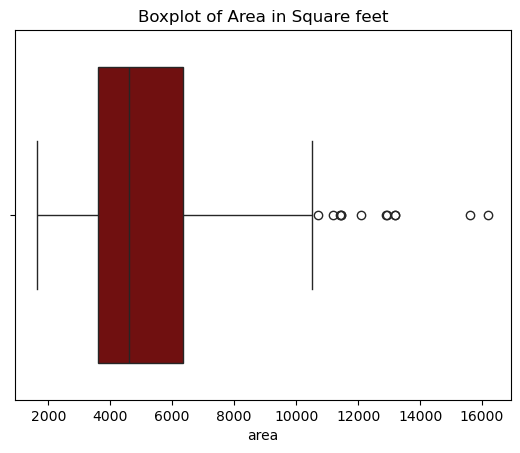

In [11]:
sns.boxplot(x='area',data=df,color='maroon')
plt.title("Boxplot of Area in Square feet")
plt.show()

As earlier predicted I can see I have outliers as there are a homes with square larger than 8000 square feet , there is also a significant jump with the outliers from 14,000 to 16,000 .
The Median area is around 4000 to 5000 square feet.
The plot also shows that I have roughly 50 percent of the houses that use between 3600 to 6000 square feet as shown by the maroon box which is the Inter-Quartile Range. 

To treat the skewness in the dataset as Linear Regression assumes a normally distributed data, it will affect how the model performs.
I will be performing the Log transformation on the price and area columns. 
1 would be added to each value so as not have 0 after applying the log transformation

In [12]:
#Apply log transformation
df['log_price'] = np.log1p(df['price'])  # Using log1p to handle zero values
df['log_area'] = np.log1p(df['area'])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price,log_area
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275,8.912069
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321037,9.100637
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321037,9.206433
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175,8.922792
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001,8.912069


Check the new histograms to confirm if the price and area columns are now normally distributed

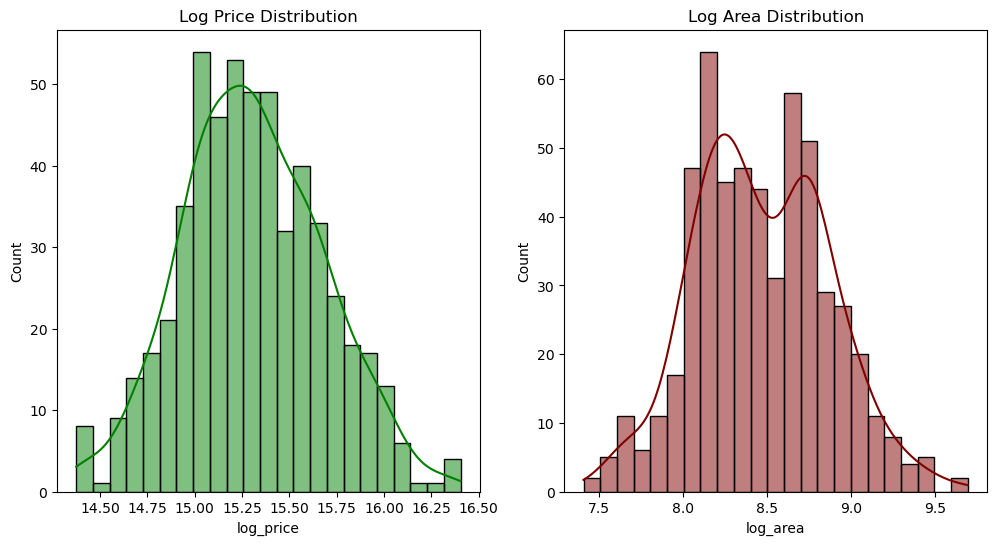

In [13]:
fig,axes= plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(x='log_price',data=df,bins=23,kde=True,color='green',ax=axes[0])
axes[0].set_title('Log Price Distribution')

sns.histplot(x='log_area',data=df,bins=23,kde=True,color='maroon',ax=axes[1])
axes[1].set_title('Log Area Distribution')

plt.show()

The data is now a little better and this should help with the performance of the model. 
Though it is not a perfectly normal distrubution but the transformation helped center the data and make it more symmetric 

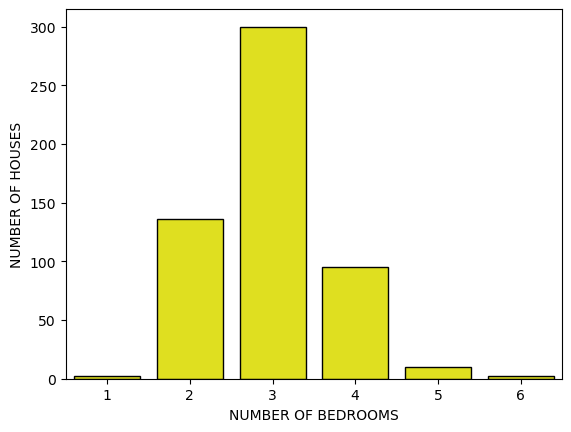

In [15]:
sns.barplot(df['bedrooms'].value_counts(),color = 'yellow' , edgecolor = 'black')
plt.xlabel('NUMBER OF BEDROOMS')
plt.ylabel('NUMBER OF HOUSES')
plt.show()

From observing the barplot, I can see most of the houses have three bedrooms , with close to 300 houses having 3 bedrooms and very few houses have 1 or 6 bedrooms.

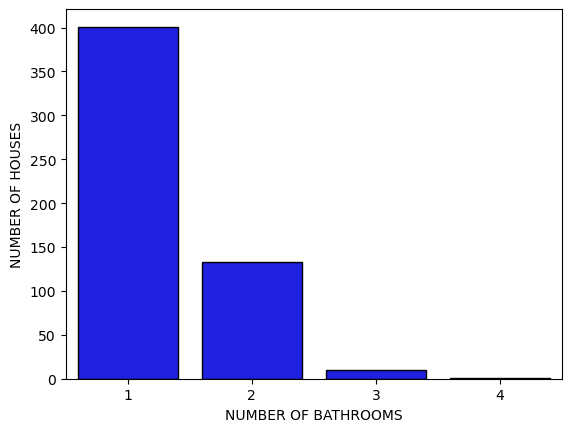

In [16]:
sns.barplot(df['bathrooms'].value_counts(),color = 'blue' , edgecolor = 'black')
plt.xlabel('NUMBER OF BATHROOMS')
plt.ylabel('NUMBER OF HOUSES')
plt.show()

Most of the houses have one only 1 bathroom or 2 bathrooms, a few of them have 3 or 4.

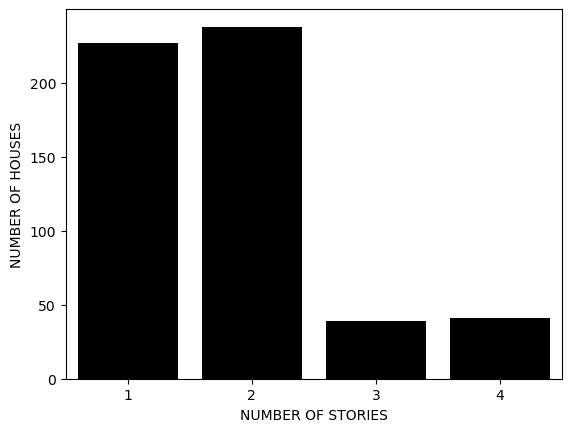

In [17]:
sns.barplot(df['stories'].value_counts(),color = 'black')
plt.xlabel('NUMBER OF STORIES')
plt.ylabel('NUMBER OF HOUSES')
plt.show()

I can clearly see that majority of the houses are either one storied or two storied

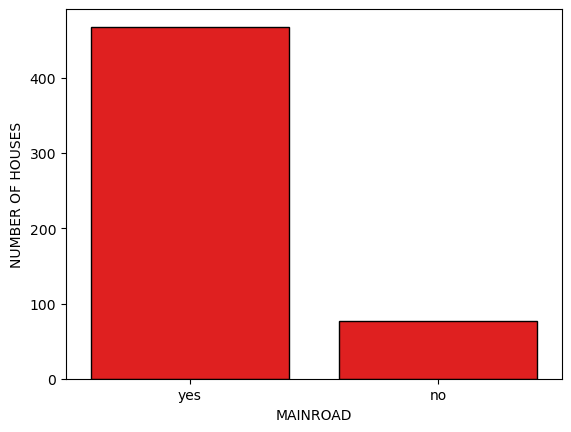

In [18]:
sns.barplot(df['mainroad'].value_counts(),color = 'red' , edgecolor = 'black')
plt.xlabel('MAINROAD')
plt.ylabel('NUMBER OF HOUSES')
plt.show()

I can see that majority of the houses are connected to the mainroad with over 450 houses.



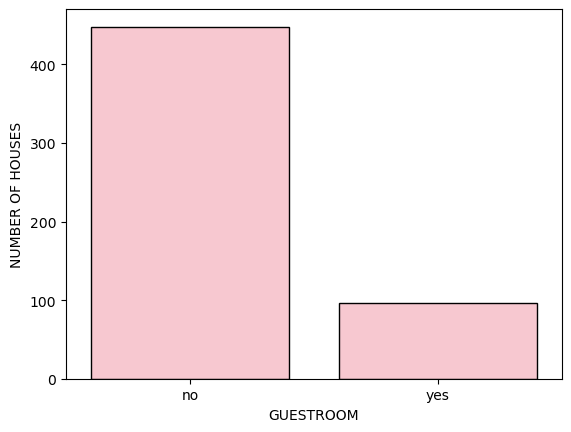

In [19]:
sns.barplot(df['guestroom'].value_counts(),color = 'pink' , edgecolor = 'black')
plt.xlabel('GUESTROOM')
plt.ylabel('NUMBER OF HOUSES')
plt.show() 

Over 400 houses do not have a guestroom compared to about 100 that have guestroom


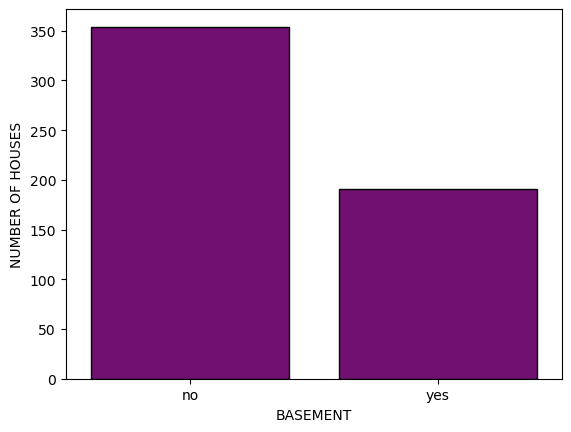

In [20]:
sns.barplot(df['basement'].value_counts(),color = 'purple' , edgecolor = 'black')
plt.xlabel('BASEMENT')
plt.ylabel('NUMBER OF HOUSES')
plt.show() 

Most of the houses do not have a Basement with only close to 200 houses out of the 545 houses have basement

Text(0, 0.5, 'NUMBER OF HOUSES')

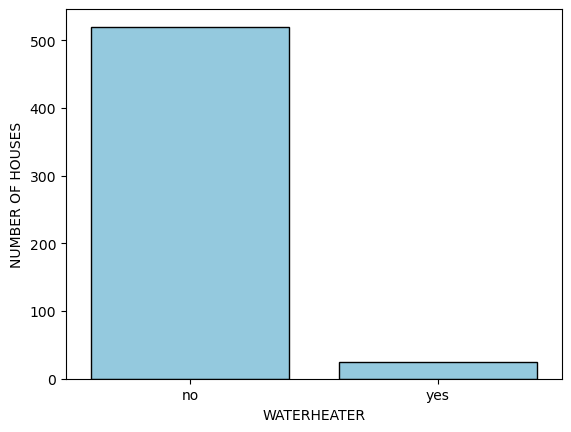

In [21]:
sns.barplot(df['hotwaterheating'].value_counts(), color = 'skyblue' , edgecolor = 'black' )
plt.xlabel('WATERHEATER')
plt.ylabel('NUMBER OF HOUSES')

Most of the houses do not have a Waterheater as it clearly shows in the barplot that over 500 of our number of samples dot have waterheater


Text(0, 0.5, 'NUMBER OF HOUSES')

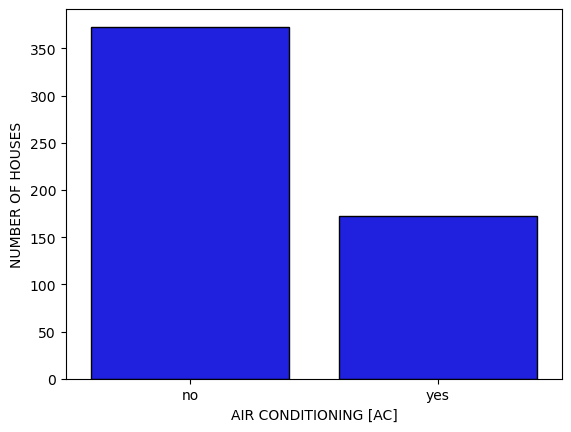

In [22]:
sns.barplot(df['airconditioning'].value_counts(), color = 'blue' , edgecolor = 'black' )
plt.xlabel('AIR CONDITIONING [AC]')
plt.ylabel('NUMBER OF HOUSES')


Majority of the houses do not have Air Conditioning with more than 350 houses not having AC



Text(0, 0.5, 'NUMBER OF HOUSES')

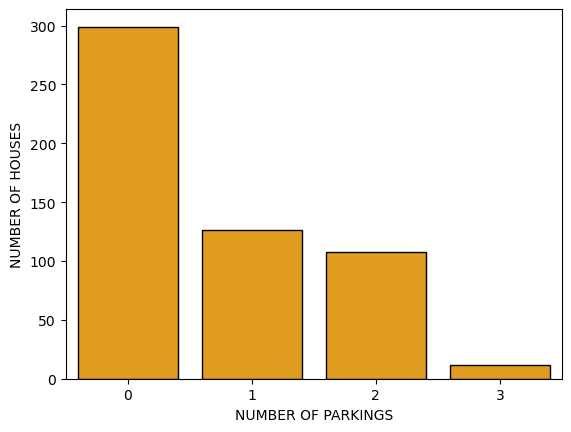

In [23]:
sns.barplot(df['parking'].value_counts(), color = 'orange' , edgecolor = 'black' )
plt.xlabel('NUMBER OF PARKINGS')
plt.ylabel('NUMBER OF HOUSES')

Majority of the houses do not have parking slot , with close to 300 number of houses not having a spot.


Text(0, 0.5, 'NUMBER OF HOUSES')

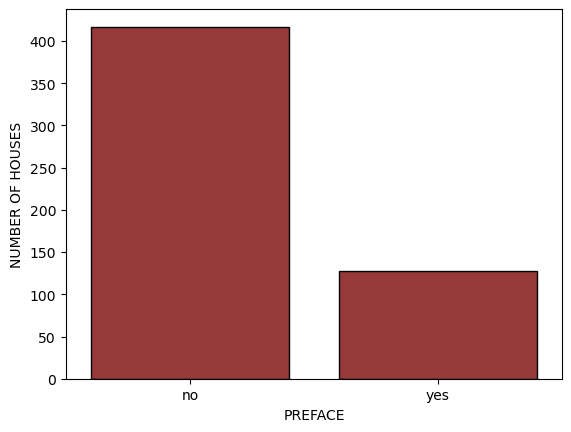

In [24]:
sns.barplot(df['prefarea'].value_counts(), color = 'brown' , edgecolor = 'black' )
plt.xlabel('PREFACE')
plt.ylabel('NUMBER OF HOUSES')


 A reasonably large amount of houses were not in the buyer's preferred Area with over 400 houses!

Text(0, 0.5, 'NUMBER OF HOUSES')

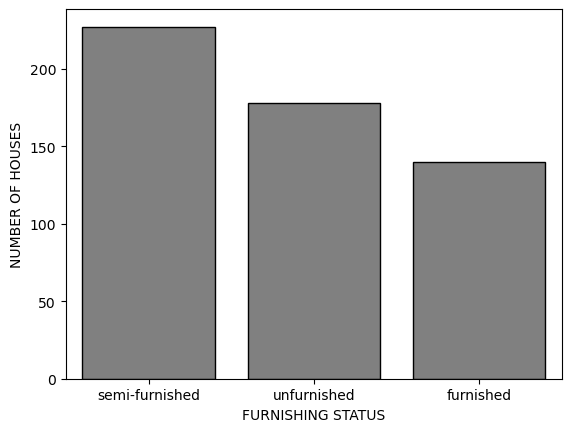

In [25]:
sns.barplot(df['furnishingstatus'].value_counts(), color = 'grey' , edgecolor = 'black')
plt.xlabel('FURNISHING STATUS')
plt.ylabel('NUMBER OF HOUSES')

Over 200 houses are semi-furnished and about 175 are unfurnished. The houses that are fully furnised are less than 150 as shown in the bar plot

##### 3.2 BI-Variate 

Q1. Does Area have a relationship with price? I will be using a scatter plot from the seabon library to visualize this. 

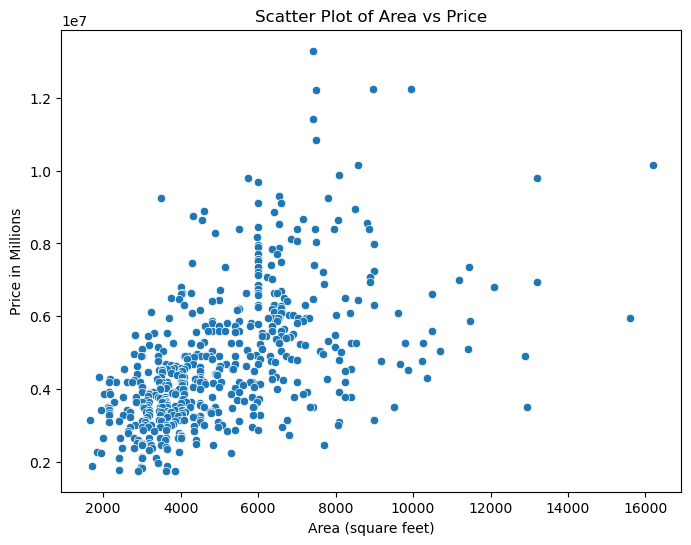

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Scatter Plot of Area vs Price')
plt.xlabel("Area (square feet)")
plt.ylabel("Price in Millions")
plt.show()

From Analyzing the scatterplot, I can can see a positive correlation between Area and Price, this indicates that larger homes(in area size) generally higher prices. Most of the properties are clustered around the smaller areas (that is, under 600 square feet) and prices vary notably between 2 million to 10 million , this suggests that there are other factors apart from area that influences price. There are also a few outliers in the scatterplot with high prices and large area as I have earlier analyzed in the univariate analysis.  

Q2. How do the other variables affect the price?

I will be defining a function to make it easier to analyze the other variables against price using a barplot from the seaborn library.

In [27]:
def against_price(variable):
    sns.barplot(x=variable,y='price',data=df,color="skyblue",edgecolor='black')
    plt.title("Barplot showing relationship between Price and "+str(variable.capitalize()))
    plt.xlabel(variable.upper())
    plt.ylabel("Price in Millions")
    
        

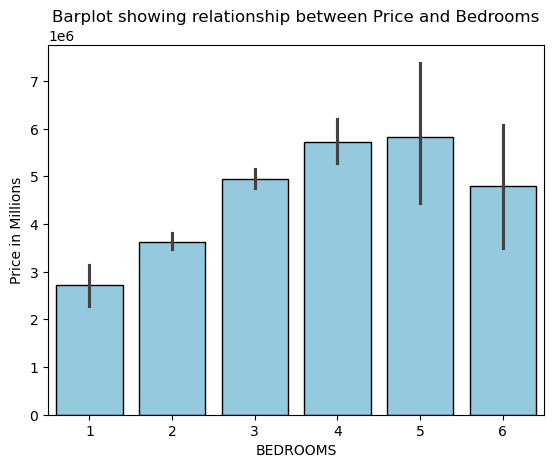

In [28]:
against_price('bedrooms')

I can see that the bar plot shows that houses with more bedrooms generally have higher prices. There is an upward trend in price as the number of bedrooms increases from 1 to 5, with a slight drop for houses with 6 bedrooms. The variability in prices (as indicated by the error bars) is also notable, particularly for homes with 5 and 6 bedrooms which have long error bars.

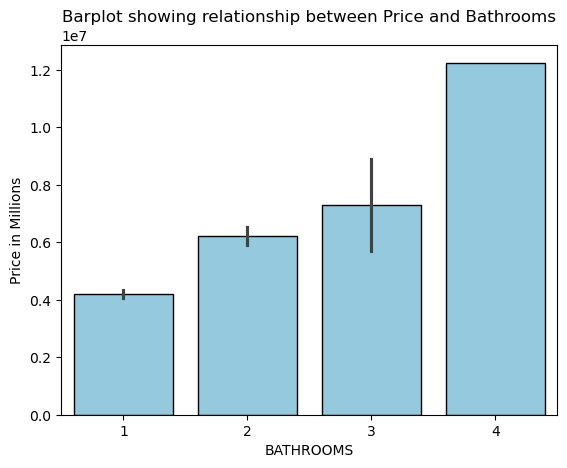

In [29]:
against_price('bathrooms')

Analyzing the above bar plot, I can see that there is also a clear upward trend in price becuase as the number of bathrooms in the house increases, the prices also increases.
There is a little variabilty in prices in houses with 1 or 2 bathrooms as is indictated by the short error bars, there's a long error bar for houses with 3 bathrooms which indicates a wide variability in prices. 

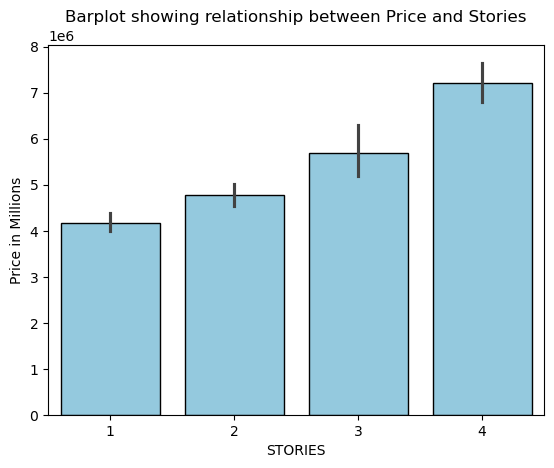

In [30]:
against_price('stories')

As shown in the bar plot, I can clearly see an upward trend in the prices as number of stories increases. there's also a variability in the data as shown by the error bars from stories 1 to 4.

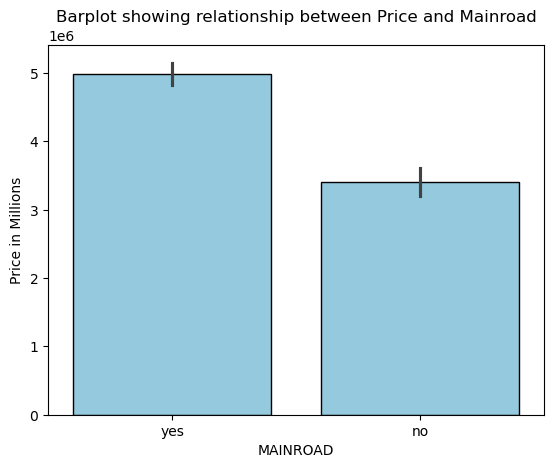

In [31]:
against_price('mainroad')

From analyzing the barplot, I can see that most houses that are connected to the mainroad have higher prices with average of about 5 million per house compared to houses not connected to the mainroad with average of 3.4 million. . The data is relatively consistent as shown by the short error bars.

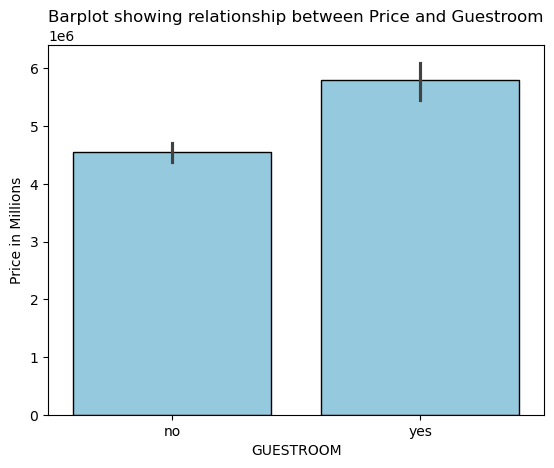

In [32]:
against_price('guestroom')

I can see that most of the houses with Guestroom have higher prices with an average of about 5.8 million compared to houses without guestroom with average of 4.5 million. There is also a relatively consistent varierty of data as shown by the error bars.

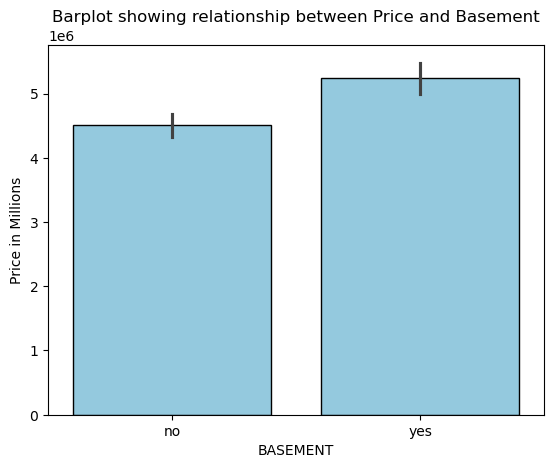

In [33]:
against_price('basement')


I can see that most of the houses with Basement have higher prices with an average of about 5.3 million compared to houses without Basement with average of 4.5 million. The data is also a relatively consistent as shown by the small error bars.

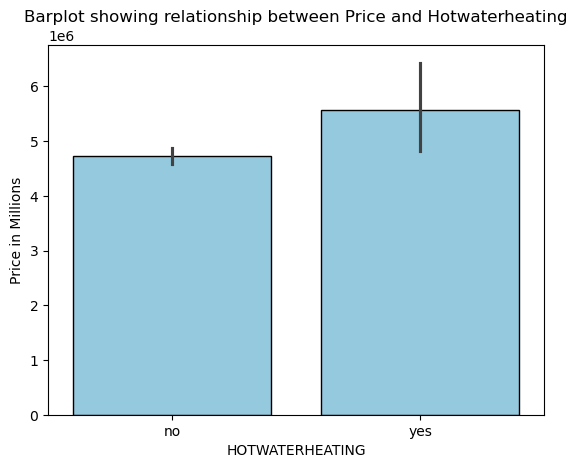

In [34]:
against_price('hotwaterheating')


As shown in the barplot, I can see that most of the houses with Water Heater have higher prices with an average of about 5.4 million compared to houses without it with average of 4.8 million. There is also a wide variety of data especially with the houses with Water heater as shown by the long error bar.

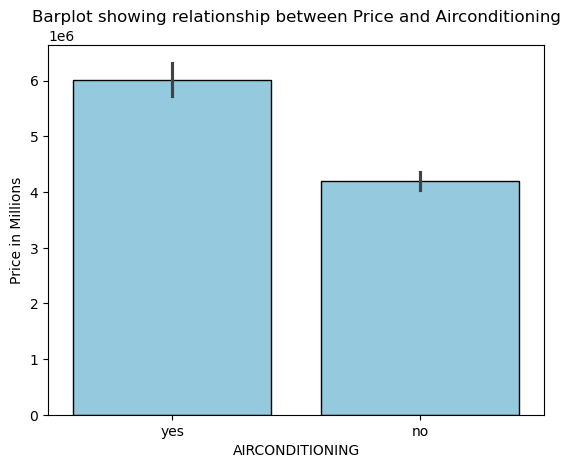

In [35]:
against_price('airconditioning')


I can see that there is a clear increase in the prices of the houses with Airconditioning(AC) an average of about 6 million compared to houses without AC with average of 4.3 million. The data is also a relatively consistent as shown by the short error bars.

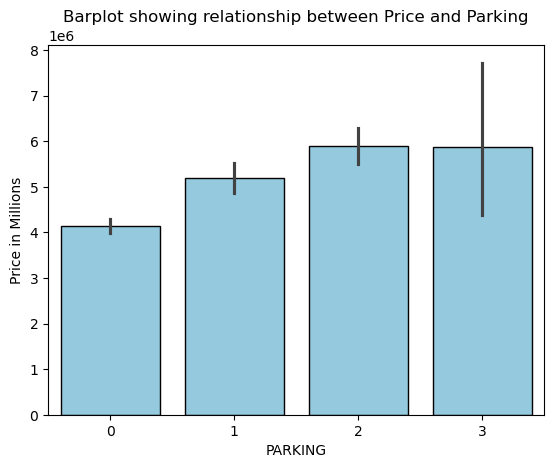

In [36]:
against_price('parking')


As shown by the barplot, There is a significant increase in prices of houses as the number of parking spaces increase. There is a clear trend that slightly drops in houses with 3 parking spaces but there is a long error bar which shows a wide variety in the data which indicates some other factors might have affected some of the houses with 3 parking space. 

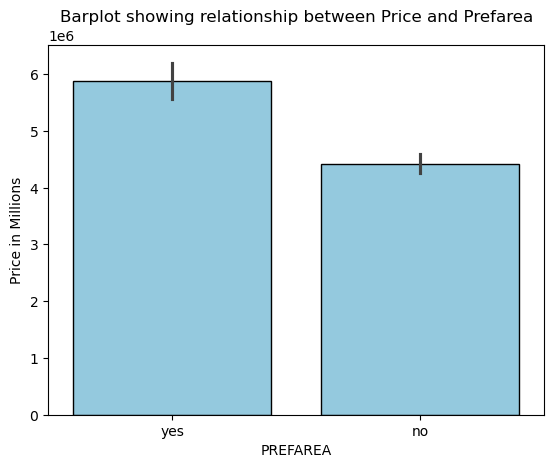

In [37]:
against_price('prefarea')


This shows that houses that were got in the buyer's preferred area tend to be more expensive than houses that are not in preferred areas , with 5.8 million and 4.4 million average respectively.

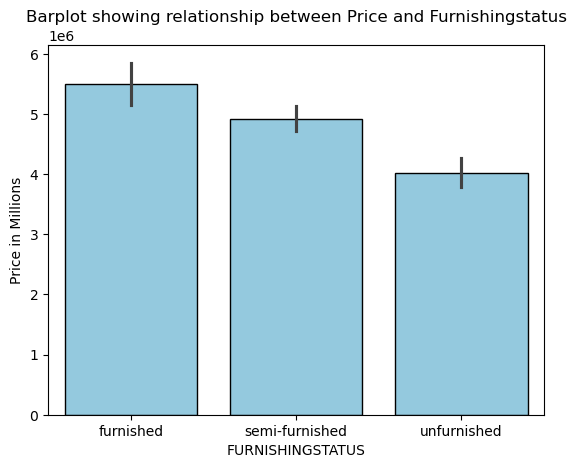

In [38]:
against_price('furnishingstatus')

The bar plot indicates that furnished houses tend to have the highest average prices, followed by semi-furnished and unfurnished properties, with prices decreasing as furnishing level drops. Furnished houses are priced around 5.5 million, while semi-furnished houses are around 4.5 million, and unfurnished properties are just under 4 million. The error bars suggest that the price variability is highest for furnished homes and relatively consistent for unfurnished homes. This suggests that furnishing status plays a significant role in determining house prices, with buyers willing to pay more for fully furnished properties. However, the variation in prices for furnished homes implies that other factor could influence this variable more.

The ".map()" function is a very useful function from the pandas library as it helps to map existing values to new values , like converting categorical variables to numerical variables like I will be doing.

In [39]:
df['mainroad']=df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom']=df['guestroom'].map({'yes': 1, 'no': 0})
df['basement']=df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning']=df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea']=df['prefarea'].map({'yes': 1, 'no': 0})



df.head()#To check the changes made by viewing the first 5 rows of the new dataframe

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price,log_area
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,16.403275,8.912069
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,16.321037,9.100637
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,16.321037,9.206433
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,16.318175,8.922792
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,16.250001,8.912069


I will be using one hot encoding for the furnishing status. This would be done using the pandas get dummies function 


In [40]:
#One Hot Encoding for the Furnishing Status Variable 

#Concacate with the original dataframe 
df = pd.get_dummies(df, columns=['furnishingstatus'])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,log_price,log_area,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,16.403275,8.912069,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,16.321037,9.100637,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,16.321037,9.206433,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,16.318175,8.922792,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,16.250001,8.912069,True,False,False


Now to drop the Price and Area column since i already transformed them for the model 

In [41]:
df.drop(columns=['price','area'],axis=1,inplace=True) 

df.rename(columns={'log_price':'price','log_area':'area'},inplace=True)

df.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,area,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4,2,3,1,0,0,0,1,2,1,16.403275,8.912069,True,False,False
1,4,4,4,1,0,0,0,1,3,0,16.321037,9.100637,True,False,False
2,3,2,2,1,0,1,0,0,2,1,16.321037,9.206433,False,True,False
3,4,2,2,1,0,1,0,1,3,1,16.318175,8.922792,True,False,False
4,4,1,2,1,1,1,0,1,2,0,16.250001,8.912069,True,False,False


In [42]:
df['furnishingstatus_furnished']=df['furnishingstatus_furnished'].astype(int) #To make the Boolean values 1 and 0 to help the model understand it better
df['furnishingstatus_semi-furnished']=df['furnishingstatus_semi-furnished'].astype(int)
df['furnishingstatus_unfurnished']=df['furnishingstatus_unfurnished'].astype(int)


df.head(3)

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,area,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4,2,3,1,0,0,0,1,2,1,16.403275,8.912069,1,0,0
1,4,4,4,1,0,0,0,1,3,0,16.321037,9.100637,1,0,0
2,3,2,2,1,0,1,0,0,2,1,16.321037,9.206433,0,1,0


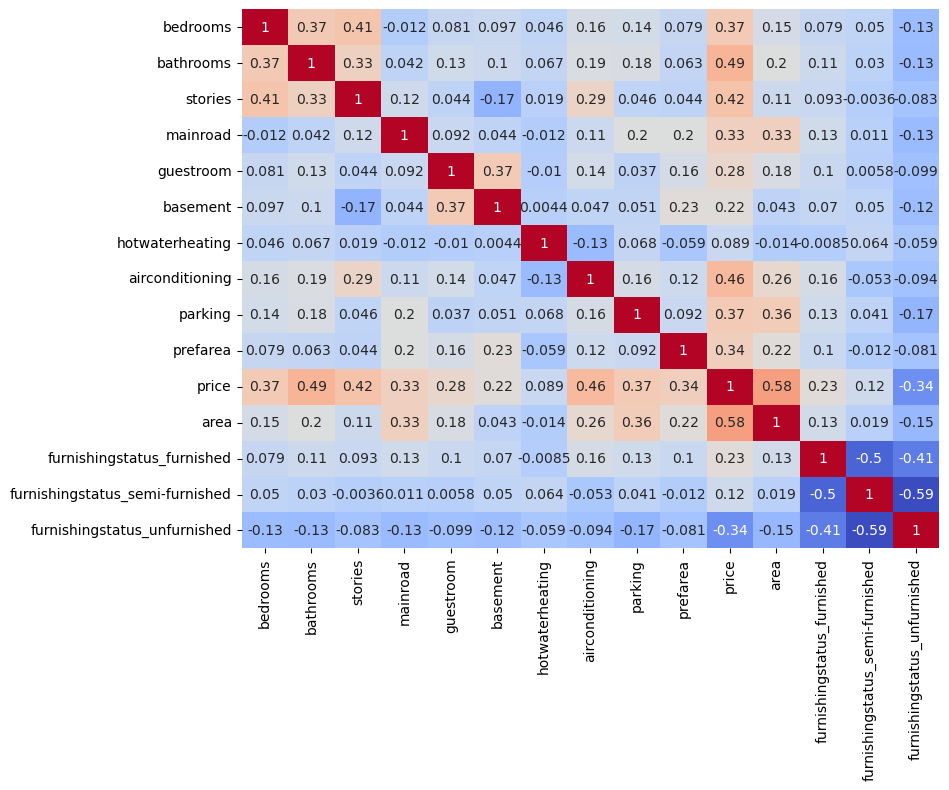

In [43]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', cbar=False)
plt.show()

From carefully analyzing the heatmap, I can see a few points;
1. Bathrooms and Price (0.49): Bathrooms show a strong positive correlation with price, indicating that houses with more bathrooms tend to have higher prices.
2. Airconditioning and Price (0.46): Airconditioning has a significant positive correlation with price, suggesting that properties with air conditioning generally have higher prices.
3. Area and Price (0.58):Area has the highest positive correlation with price, which is intuitive, as larger properties are typically more expensive.
4. Furnishing Status and Price: Furnished properties show a moderate positive correlation with price (0.23), while unfurnished properties show a negative correlation (-0.34). This suggests that furnished properties tend to sell at a premium compared to unfurnished ones.
5. Parking and Price (0.37):Parking shows a moderate positive correlation with price, indicating that properties with parking facilities tend to be priced higher.
Guestroom and Price (0.28):

Lastly, Guestroom has a weaker positive correlation with price. While it does have some impact, it is not as strong as other features like bathrooms or air conditioning.

In [44]:
df.rename(columns={'furnishingstatus_furnished':'furnished','furnishingstatus_semi-furnished':'semi-furnished','furnishingstatus_unfurnished':'unfurnished'},inplace=True) #The inplace=True is to make the changes directly into the dataframe
df.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,area,furnished,semi-furnished,unfurnished
0,4,2,3,1,0,0,0,1,2,1,16.403275,8.912069,1,0,0
1,4,4,4,1,0,0,0,1,3,0,16.321037,9.100637,1,0,0
2,3,2,2,1,0,1,0,0,2,1,16.321037,9.206433,0,1,0
3,4,2,2,1,0,1,0,1,3,1,16.318175,8.922792,1,0,0
4,4,1,2,1,1,1,0,1,2,0,16.250001,8.912069,1,0,0


Now that I am done with analyzing the multi-variables using the heatmap , I will be dropping one of the dummy variables, "Semi-Furnished" to avoid the dummy_trap and this occurs when the dummy variables are perfectly correlated and this leads multi-colinearity , because the remaining columns would still contain all the necessary information. 

When I check the dataframe, wherever there is false/0 under "furnished" and under "unfurnished" , I know with certainty that it is true/1 for the "semi-furnished" variable.
and since it's the variable that has the least correlation with price, makes the decision to drop it a little easier.

In [45]:
df.drop(columns='semi-furnished',axis=1,inplace=True) #The axis=1 is to drop the column, if it was to drop a row it wil be axis=0 

df.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,area,furnished,unfurnished
0,4,2,3,1,0,0,0,1,2,1,16.403275,8.912069,1,0
1,4,4,4,1,0,0,0,1,3,0,16.321037,9.100637,1,0
2,3,2,2,1,0,1,0,0,2,1,16.321037,9.206433,0,0
3,4,2,2,1,0,1,0,1,3,1,16.318175,8.922792,1,0
4,4,1,2,1,1,1,0,1,2,0,16.250001,8.912069,1,0


### Step 4 

##### Feature Engineering

I am going to create a new feature which will be called "Total rooms" , this will be achieved by adding bedrooms and bathrooms together as I think adding them shows the size of the house and this might impact price and help the model perform better. I will be dropping the columns afterwards to affect multi-colinearity which might affect the performance of the model.

In [50]:
df['total_rooms'] = df['bathrooms']+ df['bedrooms']+ df['guestroom']

df.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,area,furnished,unfurnished,total_rooms
0,4,2,3,1,0,0,0,1,2,1,16.403275,8.912069,1,0,6
1,4,4,4,1,0,0,0,1,3,0,16.321037,9.100637,1,0,8
2,3,2,2,1,0,1,0,0,2,1,16.321037,9.206433,0,0,5
3,4,2,2,1,0,1,0,1,3,1,16.318175,8.922792,1,0,6
4,4,1,2,1,1,1,0,1,2,0,16.250001,8.912069,1,0,6


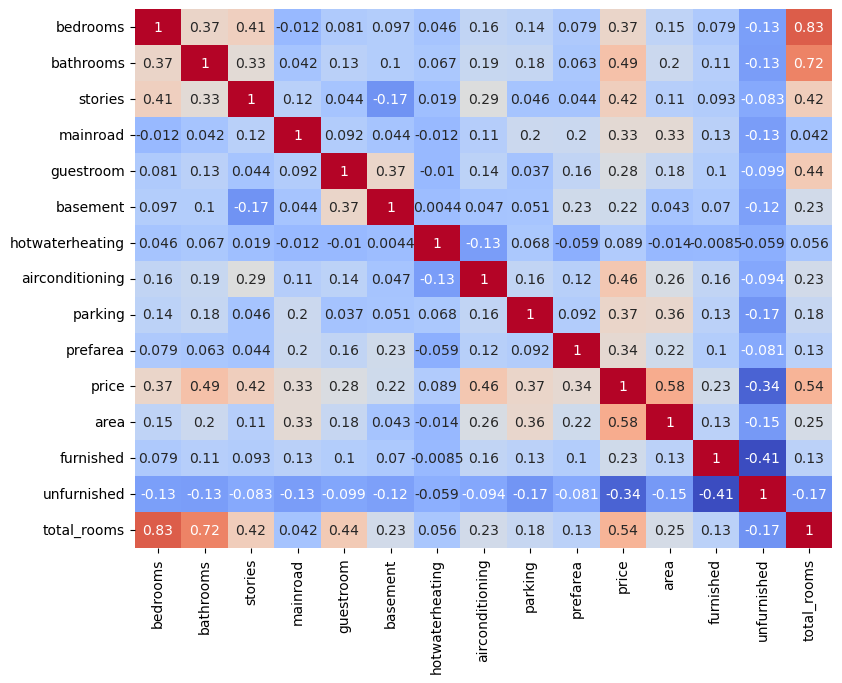

In [51]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', cbar=False)
plt.show()

Analyzing the new heatmap, I can see that the new feature created(Total rooms) has a strong positive correleation (0.54) with price , Compared to the bedrooms,bathrooms and guestrooms having 0.37,0.33 and 0.28 respectfully. It is clear that the new feature is better and it reduces multi-colinearity too, therefore, I will be dropping the old features already combined.

In [52]:
#Drop the columns 

df.drop(columns=['bathrooms','bedrooms','guestroom'],axis=1,inplace=True)

df.head()

,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,price,area,furnished,unfurnished,total_rooms
0,3,1,0,0,1,2,1,16.403275,8.912069,1,0,6
1,4,1,0,0,1,3,0,16.321037,9.100637,1,0,8
2,2,1,1,0,0,2,1,16.321037,9.206433,0,0,5
3,2,1,1,0,1,3,1,16.318175,8.922792,1,0,6
4,2,1,1,0,1,2,0,16.250001,8.912069,1,0,6


##### Feature Scaling

Feature scaling ensures that all numerical features are on a similar scale , and this is useful when features like Area have large values compared to Total_rooms or Price, preventing some models from being biased by features with larger scales.

There are a few ways to scale but I will be  using the Standardization (Z-score normalization): this Centers the data around mean 0 and standard deviation 1. 

#### Feature Selection 
Before scaling, I have to select the features first 
Based on the earier analysis especially the the heatmap which showed the correlation between the features, I will be selecting these features;
1. Area
2. Total Rooms
3. Stories
4. Air Conditioning
5. Parking
6. Furnished (one-hot encoded)
7. Unfurnished (one-hot encoded)


In [53]:
scaler= StandardScaler() #initialize the scaler 
features= ['area','total_rooms','stories','airconditioning','parking','furnished','unfurnished']
scaled_features = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(scaled_features,columns=features) #Create the new scaled dataframe

df_scaled['price']=df['price'] #Add the target variables price that was not scaled 

df_scaled.head() 

,area,total_rooms,stories,airconditioning,parking,furnished,unfurnished,price
0,1.119332,1.370760,1.378217,1.472618,1.517692,1.700840,-0.696429,16.403275
1,1.593323,3.116238,2.532024,1.472618,2.679409,1.700840,-0.696429,16.321037
2,1.859255,0.498022,0.224410,-0.679063,1.517692,-0.587945,-0.696429,16.321037
3,1.146285,1.370760,0.224410,1.472618,2.679409,1.700840,-0.696429,16.318175
4,1.119332,1.370760,0.224410,1.472618,1.517692,1.700840,-0.696429,16.250001


#### Step 5

Model Building 

The first step in building the model is to split the data into training and test set, this is an important process as it helps to evaluate the model performance most especially on out of sample set, Training the model on all the data might result in overfitting. 

In [143]:
# define the predictor and target variables
x = df_scaled.drop(columns='price',axis=1)
y = df_scaled['price']

In [144]:
print('the data shape for X:',x.shape,'\n Data shape for Y:',y.shape)

the data shape for X: (545, 7) 
 Data shape for Y: (545,)


In [145]:
#I already imported the train_test_split function from scikit library 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) 
print(x_train.shape,y_train.shape)

(436, 7) (436,)


Checking the training dataset to ensure we have 80 percent of the data for training of the model. i.e, 0.8 multiplied by 545 , We would have 436 data points as confirmed by the x_train shape

The Random State function is used to ensure reproducibility. By setting random_state to a specific value (like 42), I ensure that every time the code is ran, I get the same results. This is a very good practice for Machine learning!

The next step is to build the linear regression model to fit the training data 

In [146]:
lr = LinearRegression() 

lr.fit(x_train,y_train)

LinearRegression()

Now to use the model to make predictions and view the first few predictions before evaluating the performance 

In [147]:
yhat= lr.predict(x_test)
print(yhat[0:6])#prints the first 6 entries in the predicted series 


[15.39637135 15.66976188 15.03409089 15.41033958 15.13599806 15.15910212]


##### Model Evaluation

There are a lot of ways to evaluate the model, I will be In-Sample calculations like using R-Squared error and Mean Squared Error.
1. R-Squared Error:This is also known as coefficient of determination, This is a measure to determine how close the data is to the fitted regression line,i.e, the percentage of the variation of the target variable that is explained by the linear model.
2. Mean Squared Error (MSE): The MSE finds the difference between actual value and the predicted value and square it. We then take all the errors by the adding them together and dividing by the number of samples.

I already imported the R2 and MSE from the sckit learn library earlier.

In [148]:
R_squared_error = r2_score(yhat,y_test) 

MSE = mean_squared_error(yhat,y_test) 

print("The Mean Squared Error is:",MSE,'\nThe R squared error is:',R_squared_error)  

The Mean Squared Error is: 0.06983736488985012 
The R squared error is: 0.12243572125188051


Having a R2 score of 0.1222436 approximately basically means that only about 12 percent of the variance in the house prices is expained by the features in the model. This suggests that the model is not capturing the relationships in the data very well. 
While the MSE of 0.0698 suggest that the model's predictions are relatively close to the actual values,The scale of the target variable(Price) matters when interpreting this. As i already performed log transformation to the Price variable.

Now to calculate the MSE and R2 score of the training data , so I will know if the model underfits or not!

In [149]:
y_train_predict = lr.predict(x_train)


training_MSE = r2_score(y_train, y_train_predict)

training_r2 = mean_squared_error(y_train,y_train_predict) 

print("The Mean Squared Error is:",training_MSE, "\nThe R squared error is:" ,training_r2)

The Mean Squared Error is: 0.6333933079923437 
The R squared error is: 0.04559441005576463


An MSE of 0.6334 indicates that the average squared difference between the predicted and actual values is relatively high. This suggests that the model's predictions are not very close to the actual target values for the training set. 
An R2 value of 0.0456 means that only about 4.56% of the variance in the target variable price (log transformed) is explained by the model. This is quite low, suggesting that the model does not fit the training data well. 

Now to the next step which is to improve the model.


### Step 6 
##### Model Improvement!!

I will be using Ridge Regression and Polynomial Features for model improvemet
1. Ridge Regression: This adds regularization to penalize large coefficients, which can help in cases of overfitting and underfitting. In the case of the model I trained earlier,Ridge regression might improve it by reducing the impact of less important features and focusing on more relevant ones.

2. Polynomial Features: This allows the model to capture non-linear relationships between the independent variables and the target variable, which linear models may fail to capture. In the case of my model, Since it may not be capturing complex relationships (as seen by the low R2 score), adding polynomial features could help reveal underlying patterns that a simple linear model is missing.

Polynomial features, combined with Ridge regression, can increase the flexibility of my model while still keeping it controlled to avoid overfitting. 

I will be using a pipeline to simplify the code , and also use a GridSearchCv for Cross Validation. 

The GridSearch is important for finding the optimal values for alpha(i.e Regularization strength for Ridge) and the the degree of polynomial.

GridSearch CV is used for automating the process of hyparamters tuning for improvement of the model.
 

I will be using polynomial Degree 1 to 3 because Typically, degrees between 1 and 3 work well for most datasets, especially when the number of data points is limited. Higher degrees can lead to overfitting, particularly with a relatively small dataset like this dataset(545 entries). 

For Ridge, I will be using between 0.001 to 100 as this provides a balance and helps to prevent overfitting.

I will be using 10 folds for the Gridsearch

In [150]:
pipe = Pipeline([('Polynomial',PolynomialFeatures()),('Ridge',Ridge())]) 

param_grid = {'Polynomial__degree':[1,2,3],'Ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]} 

grid_search = GridSearchCV(pipe,param_grid,cv=10,scoring='neg_mean_squared_error') 

#Fit the model 
grid_search.fit(x_train,y_train) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Polynomial', PolynomialFeatures()),
                                       ('Ridge', Ridge())]),
             param_grid={'Polynomial__degree': [1, 2, 3],
                         'Ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [151]:
#To get the best parameters found using the gridsearch

best_estimator = grid_search.best_estimator_
print(best_estimator)

Pipeline(steps=[('Polynomial', PolynomialFeatures(degree=1)),
                ('Ridge', Ridge(alpha=10))])


I can see that the best estimator is using Polynomial degree 1 and using alpha 10 

now to test the model using the best estimators

In [152]:
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(x_train) 
y_test_pred = best_model.predict(x_test)



Next step is to check the MSE and R2 score for both training and test set 

In [153]:
grid_MSE_train = mean_squared_error(y_train,y_train_pred)
grid_MSE_test = mean_squared_error(y_test,y_test_pred)
grid_r2_train = r2_score(y_train,y_train_pred)
grid_r2_test = r2_score(y_test,y_test_pred)

In [154]:
print(f"Training MSE: {grid_MSE_train}")
print(f"Test MSE: {grid_MSE_test}")
print(f"Training R2 score: {grid_r2_train}")
print(f"Test R2 score:{grid_r2_test}")

Training MSE: 0.04560765779157404
Test MSE: 0.07036154067452882
Training R2 score: 0.6332867881668708
Test R2 score:0.6355997934477908


I now have a much better model compared to the earlier Linear Regression. 

Training MSE (Mean Squared Error): 0.0456
This indicates how well the model fits the training data. A lower value is better, so this suggests the model has learned the training data effectively.

Test MSE: 0.0704
This is the error on the out of sample data. It’s slightly higher than the training MSE, which is typical and suggests some degree of generalization.

Training R squared Score: 0.6333
This indicates that about 63.33% of the variance in the training data can be explained by your model. This is a moderate level of fit.

Test R squared Score: 0.6356
Similar to the training R², this shows that approximately 63.56% of the variance in the test data is explained by the model. The fact that it is close to the training score indicates good generalization. 

There are ways to improve this model like hypertuning the parameters. I will also be trying the same model but without the earlier log transformations and see how it will perform but with the same features and scaling(Standard or Z score Scale). 


I will have to undo the scaling on the data and the log transformation I did on area and price. 
The Scaler.inverse_transform() function from the sklearn Standard scaler library would be used to reverse the scaling on the features 
while for undoing the log ,I will be appyling np.expm1() function from the numpy library, this is the inverse of the logarithmic function, converting the values back to the original scale and adding 1.

In [155]:
#X_new is to create a new df without the scaling 
X_new = scaler.inverse_transform(x)  # Reverses scaling on features
# Convert the NumPy array back to a DataFrame, using the original columns
new_df = pd.DataFrame(X_new, columns=df[features].columns, index=df[features].index)

new_df.head()  # Now this is a DataFrame again with column names



,area,total_rooms,stories,airconditioning,parking,furnished,unfurnished
0,8.912069,6.0,3.0,1.0,2.0,1.0,0.0
1,9.100637,8.0,4.0,1.0,3.0,1.0,0.0
2,9.206433,5.0,2.0,0.0,2.0,0.0,0.0
3,8.922792,6.0,2.0,1.0,3.0,1.0,0.0
4,8.912069,6.0,2.0,1.0,2.0,1.0,0.0


Now to undo the Log done earlier on both Area and Price columns, then training the Ridge and Polynomial Features model on the new dataframe

In [156]:
new_df['price']=y

new_df.head(3)

,area,total_rooms,stories,airconditioning,parking,furnished,unfurnished,price
0,8.912069,6.0,3.0,1.0,2.0,1.0,0.0,16.403275
1,9.100637,8.0,4.0,1.0,3.0,1.0,0.0,16.321037
2,9.206433,5.0,2.0,0.0,2.0,0.0,0.0,16.321037


In [157]:
new_df['area_original'] = np.expm1(new_df['area'])   # Subtract 1 since i already added 1 to the values when i originally transformed the data 
new_df['price_original'] = np.expm1(new_df['price'])   # Same for price 

new_df.head(1)

,area,total_rooms,stories,airconditioning,parking,furnished,unfurnished,price,area_original,price_original
0,8.912069,6.0,3.0,1.0,2.0,1.0,0.0,16.403275,7420.0,13300000.0


In [158]:
# Next step is to drop the log transformed values and training the model 

new_df.drop(columns=['area','price'],axis=1,inplace=True) 

new_df.head()

,total_rooms,stories,airconditioning,parking,furnished,unfurnished,area_original,price_original
0,6.0,3.0,1.0,2.0,1.0,0.0,7420.0,13300000.0
1,8.0,4.0,1.0,3.0,1.0,0.0,8960.0,12250000.0
2,5.0,2.0,0.0,2.0,0.0,0.0,9960.0,12250000.0
3,6.0,2.0,1.0,3.0,1.0,0.0,7500.0,12215000.0
4,6.0,2.0,1.0,2.0,1.0,0.0,7420.0,11410000.0


The next process is to train a new model using Grid Search CV but without the log transformations 

Data splitting 

In [159]:
x_Grid = new_df.drop(columns='price_original',axis=1) 
y_Grid = new_df['price_original'] 

x_grid_train,x_grid_test,y_grid_train,y_grid_test = train_test_split(x_Grid,y_Grid,test_size=0.2,random_state=42) 

print(x_grid_train.shape) #To confirm the datashape 

(436, 7)


### 1. New model but without the Log transformations

In [160]:
x_grid_train_scaled = scaler.fit_transform(x_grid_train)
x_grid_test_scaled = scaler.fit_transform(x_grid_test) 



In [161]:
# Training the new model 

new_pipe = Pipeline([('Polynomial',PolynomialFeatures()),('Ridge',Ridge())]) 

new_param_grid = {'Polynomial__degree':[1,2,3],'Ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]} 

grid_search_scaled = GridSearchCV(new_pipe,new_param_grid,cv=10,scoring='neg_mean_squared_error') 

#Fit the model 
grid_search_scaled.fit(x_grid_train_scaled,y_grid_train) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Polynomial', PolynomialFeatures()),
                                       ('Ridge', Ridge())]),
             param_grid={'Polynomial__degree': [1, 2, 3],
                         'Ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [162]:
# New best estimator
best_estimator_scaled = grid_search_scaled.best_estimator_
print(best_estimator_scaled)

Pipeline(steps=[('Polynomial', PolynomialFeatures()),
                ('Ridge', Ridge(alpha=100))])


In [163]:
# train the model with best estimator and evaluate it.
best_model_scaled = best_estimator_scaled.fit(x_grid_train_scaled,y_grid_train)

#Make prediction 

y_grid_train_pred = best_model_scaled.predict(x_grid_train_scaled)
y_grid_test_pred = best_model_scaled.predict(x_grid_test_scaled) 


Evaluate using r2 score and Mean squared error 

In [164]:
grid_scaled_MSE_train = mean_squared_error(y_grid_train_pred,y_grid_train)
grid_scaled_MSE_test = mean_squared_error(y_grid_test,y_grid_test_pred)
grid_scaled_r2_train = r2_score(y_grid_train_pred,y_grid_train)
grid_scaled_r2_test = r2_score(y_grid_test,y_grid_test_pred)

In [165]:
print(f"Training MSE: {grid_scaled_MSE_train}")
print(f"Test MSE: {grid_scaled_MSE_test}")
print(f"Training R2 score: {grid_scaled_r2_train}")
print(f"Test R2 score:{grid_scaled_r2_test}") 

Training MSE: 1063753506434.5616
Test MSE: 2310508801138.371
Training R2 score: 0.36853563835859016
Test R2 score:0.5428871914872718


The model’s MSE is high and it even performs worse on the test set and the Training R² score (0.37) suggests it's underfitting, not capturing enough patterns in the training data. The Test R² score (0.54) is better, but the gap shows the model may need more complex features. 

### 2. New model but with all the features and without the log transformations
Now to train a new Ridge and Polynomial features model but with the full features in the dataset including the new feature(total rooms) and compare the models after evaluating the performance 

In [166]:
df.head() 

,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,price,area,furnished,unfurnished,total_rooms
0,3,1,0,0,1,2,1,16.403275,8.912069,1,0,6
1,4,1,0,0,1,3,0,16.321037,9.100637,1,0,8
2,2,1,1,0,0,2,1,16.321037,9.206433,0,0,5
3,2,1,1,0,1,3,1,16.318175,8.922792,1,0,6
4,2,1,1,0,1,2,0,16.250001,8.912069,1,0,6


This is the dataset after creating the total rooms feature , I will be undoing the log transformation here too ,then scale the data and train using gridsearch

In [167]:
df2 = df.copy() # To clone the dataframe for the new model
df2['area_original'] = np.expm1(df2['area'])   # Subtract 1 since i already added 1 to the values when i originally transformed the data 
df2['price_original'] = np.expm1(df2['price'])   # Same for price 

df2.head(4)

,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,price,area,furnished,unfurnished,total_rooms,area_original,price_original
0,3,1,0,0,1,2,1,16.403275,8.912069,1,0,6,7420.0,13300000.0
1,4,1,0,0,1,3,0,16.321037,9.100637,1,0,8,8960.0,12250000.0
2,2,1,1,0,0,2,1,16.321037,9.206433,0,0,5,9960.0,12250000.0
3,2,1,1,0,1,3,1,16.318175,8.922792,1,0,6,7500.0,12215000.0


drop the log transformed columns(price and area )

In [168]:
df2.drop(columns=['area','price'],axis=1,inplace=True) 

df2.head(1)#check the first row 

,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,unfurnished,total_rooms,area_original,price_original
0,3,1,0,0,1,2,1,1,0,6,7420.0,13300000.0


Train the new model 

In [169]:
x4 = df2.drop(columns='price_original',axis=1) 
y4 = df2['price_original']

#Scale the features 

x4 = scaler.fit_transform(x4)

#Split the features and target 

x4_train,x4_test,y4_train,y4_test = train_test_split(x4,y4,test_size=0.2,random_state=42)

In [170]:
# Training the new model 

pipe3 = Pipeline([('Polynomial',PolynomialFeatures()),('Ridge',Ridge())]) 

param_grid3 = {'Polynomial__degree':[1,2,3],'Ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]} 

grid3 = GridSearchCV(pipe3,param_grid3,cv=10,scoring='neg_mean_squared_error') 

#Fit the model 
grid3.fit(x4_train,y4_train) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Polynomial', PolynomialFeatures()),
                                       ('Ridge', Ridge())]),
             param_grid={'Polynomial__degree': [1, 2, 3],
                         'Ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [171]:
best_estimator3 = grid3.best_estimator_

print(best_estimator3)

Pipeline(steps=[('Polynomial', PolynomialFeatures(degree=1)),
                ('Ridge', Ridge(alpha=10))])


The best estimators are degree 1 for the polynomial features and aplha 10 for the Ridge 
now to train the data with the best estimators and Evaluate the model. 

In [172]:
best_model3 = best_estimator3.fit(x4_train,y4_train)

#Make predictions 

y4_train_pred = best_model3.predict(x4_train)
y4_test_pred = best_model3.predict(x4_test)

Evaluate the model using r2 score and mean squared error

In [173]:
df2_MSE_train = mean_squared_error(y4_train,y4_train_pred)
df2_MSE_test = mean_squared_error(y4_test,y4_test_pred)
df2_r2_train = r2_score(y4_train,y4_train_pred)
df2_r2_test = r2_score(y4_test,y4_test_pred) 

In [174]:
print(f"Training MSE: {df2_MSE_train}")
print(f"Test MSE: {df2_MSE_test}")
print(f"Training R2 score: {df2_r2_train}")
print(f"Test R2 score:{df2_r2_test}") 

Training MSE: 1074475974843.6833
Test MSE: 1764524431431.4854
Training R2 score: 0.6515279785306998
Test R2 score:0.6509051520844362


The training Mean Squared Error (MSE) is approximately 1.07 trillion, indicating that the model has some level of accuracy on the training data. However, the test MSE, at about 1.76 trillion, suggests that the model is performing worse on unseen data, potentially indicating overfitting. The R² scores are quite similar for both training (0.65) and testing (0.65), suggesting that the model explains about 65% of the variance in both datasets. This consistent R² score across the datasets indicates that the model maintains its predictive power, although improvements could be made. Overall, the model shows decent performance. 

### 3. New model but with all the features and with the log transformations

In [175]:
x5 = df.drop(columns='price',axis=1) 
y5 = df['price']

#Scale the features 

x5 = scaler.fit_transform(x4)

#Split the features and target 

x5_train,x5_test,y5_train,y5_test = train_test_split(x5,y5,test_size=0.2,random_state=42)

In [176]:
# Training the new model 

pipe4 = Pipeline([('Polynomial',PolynomialFeatures()),('Ridge',Ridge())]) 

param_grid4 = {'Polynomial__degree':[1,2,3],'Ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]} 

grid4 = GridSearchCV(pipe4,param_grid4,cv=10,scoring='neg_mean_squared_error') 

#Fit the model 
grid4.fit(x5_train,y5_train) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Polynomial', PolynomialFeatures()),
                                       ('Ridge', Ridge())]),
             param_grid={'Polynomial__degree': [1, 2, 3],
                         'Ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [177]:
best_estimator4 = grid3.best_estimator_

print(best_estimator4)

Pipeline(steps=[('Polynomial', PolynomialFeatures(degree=1)),
                ('Ridge', Ridge(alpha=10))])


The best estimators are degree 1 for the polynomial features and aplha 10 for the Ridge 
now to train the data with the best estimators and Evaluate the model. 

In [178]:
best_model4 = best_estimator4.fit(x5_train,y5_train)

#Make predictions 

y5_train_pred = best_model4.predict(x5_train)
y5_test_pred = best_model4.predict(x5_test)

In [179]:
df_MSE_train = mean_squared_error(y5_train,y5_train_pred)
df_MSE_test = mean_squared_error(y5_test,y5_test_pred)
df_r2_train = r2_score(y5_train,y5_train_pred)
df_r2_test = r2_score(y5_test,y5_test_pred) 

In [180]:
print(f"Training MSE: {df_MSE_train}")
print(f"Test MSE: {df_MSE_test}")
print(f"Training R2 score: {df_r2_train}")
print(f"Test R2 score:{df_r2_test}") 

Training MSE: 0.039634244757268275
Test MSE: 0.06195804585497638
Training R2 score: 0.6813166494990799
Test R2 score:0.6791212288605017


The model shows a training MSE of approximately 0.0396 and a test MSE of about 0.0620, indicating relatively good predictive performance on both training and unseen data. The training Rsqaured score of around 0.68 suggests that the model explains about 68% of the variance in the training set, while the test squared score, also at approximately 0.68, confirms consistent performance on the test set. The similarity in R squared scores indicates that the model is not overfitting, as it retains predictive power across datasets. Overall, the log transformation applied to the area and price columns, along with other features, appears to enhance model performance, resulting in lower errors and improved variance explanation.

### Step 7 

Building a new model 

Random Forest Regressor 

I will be training A RandomForestRegressor model , as it  can be more effective than Linear Regression for the housing dataset, especially if the relationships between features and house prices are non-linear or complex. Which i think is the case with the way the Linear Regression model worked . 
RandomForestRegressor  being an ensemble of decision trees, does not assume any specific form of the relationship between features and target. It can capture complex, non-linear patterns, which are common in real-world datasets like the dataset used for this project. 
Random forests are more robust to outliers because they split the data based on thresholds and aggregate predictions from multiple trees. This reduces the impact of extreme values. there are some outliers found in the dataset at price and area , so this might make it a more efficient model and in comparispn with Ridge Regression plus Polynomial features, Random Forest Regressor tends to excel in capturing complex patterns in data, being robust to outliers, and providing intuitive insights into feature importance, making it a strong alternative to Ridge regression with polynomial features for predicting house prices in the housing dataset. But I will be confirming by building the model below!


To train I will be using the clean datasets with the original features (i.e, without any log transformations and without scaling) 
For Random Forest, scaling is generally not needed.

In [ ]:
# Dataframe for RandomForestClassifier 
df_RFR = pd.read_csv('Housing.csv',header=0) 

df_RFR.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [182]:
df_RFR['mainroad']=df_RFR['mainroad'].map({'yes': 1, 'no': 0})
df_RFR['guestroom']=df_RFR['guestroom'].map({'yes': 1, 'no': 0})
df_RFR['basement']=df_RFR['basement'].map({'yes': 1, 'no': 0})
df_RFR['hotwaterheating']=df_RFR['hotwaterheating'].map({'yes': 1, 'no': 0})
df_RFR['airconditioning']=df_RFR['airconditioning'].map({'yes': 1, 'no': 0})
df_RFR['prefarea']=df_RFR['prefarea'].map({'yes': 1, 'no': 0})



df_RFR.head()#To check the changes made by viewing the first 5 rows of the new dataframe

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [183]:
#One Hot Encoding for the Furnishing Status Variable 

#Concacate with the original dataframe 
df_RFR = pd.get_dummies(df_RFR, columns=['furnishingstatus'])

df_RFR.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [184]:
df_RFR['furnishingstatus_furnished']=df_RFR['furnishingstatus_furnished'].astype(int) #To make the Boolean values 1 and 0 to help the model understand it better
df_RFR['furnishingstatus_semi-furnished']=df_RFR['furnishingstatus_semi-furnished'].astype(int)
df_RFR['furnishingstatus_unfurnished']=df_RFR['furnishingstatus_unfurnished'].astype(int)
df_RFR.rename(columns={'furnishingstatus_furnished':'furnished','furnishingstatus_semi-furnished':'semi-furnished','furnishingstatus_unfurnished':'unfurnished'},inplace=True)



df_RFR.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [185]:
#Data splitting 

predictors = df_RFR.drop(columns='price',axis=1)
target = df_RFR['price']


predictors_train,predictors_test,target_train,target_test = train_test_split(predictors,target,test_size=0.2,random_state=42)


In [186]:
RFR= RandomForestRegressor(random_state=42)

RFR.fit(predictors_train,target_train)

target_pred = RFR.predict(predictors_test)

In [187]:
RFR_MSE = mean_squared_error(target_pred,target_test)
RFR_R2 = r2_score(target_pred,target_test)


print(f"The Test score MSE is {RFR_MSE} while the r squared score is {RFR_R2}")

The Test score MSE is 1960614432820.494 while the r squared score is 0.2433726132484333


The Mean Squared Error (MSE) is quite high, and the R² score of 0.243 suggests that the model is not explaining the variance in the target variable very well. 
Now to find ways to improve the model's performance. 

Hyperparameter Tuning : I will be tuning some of the hyperparameters and see how well the model performs after. 
I will be using GridSearch to automate the process 

In [188]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=RFR, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(predictors_train, target_train)

print(f'Best parameters: {grid_search.best_params_}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


The best paramters from the grid search are max_depth : None, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 300 

In [189]:
# To train a new model with the best parameters 

model = grid_search.best_estimator_

grid_target_pred = model.predict(predictors_test) 

In [190]:
#Calculate new evaluation scores

RFR_MSE_grid = mean_squared_error(grid_target_pred,target_test)
RFR_R2_grid = r2_score(grid_target_pred,target_test)


print(f"The Test score MSE is {RFR_MSE_grid} while the r squared score is {RFR_R2_grid}") 

The Test score MSE is 2047696488587.6506 while the r squared score is 0.15021809336824032


I will be checking the features and trying to remove the lowest important features to try to improve the model

In [191]:
importances = model.feature_importances_
feature_names = predictors.columns
sorted_indices = np.argsort(importances)[::-1]

print("Feature Importance Ranking:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")


Feature Importance Ranking:
area: 0.4914611308114635
bathrooms: 0.17462181627962742
airconditioning: 0.0626037319810901
stories: 0.04736941434193568
parking: 0.04339031398962685
bedrooms: 0.04095458449533414
unfurnished: 0.03607661624395147
basement: 0.027629393352997113
prefarea: 0.02556123278729428
hotwaterheating: 0.01830841214681987
guestroom: 0.013519070477833852
mainroad: 0.008186071294173003
furnished: 0.005219076964027147
semi-furnished: 0.005099134833825632


Barplot to carefully analyze the features below

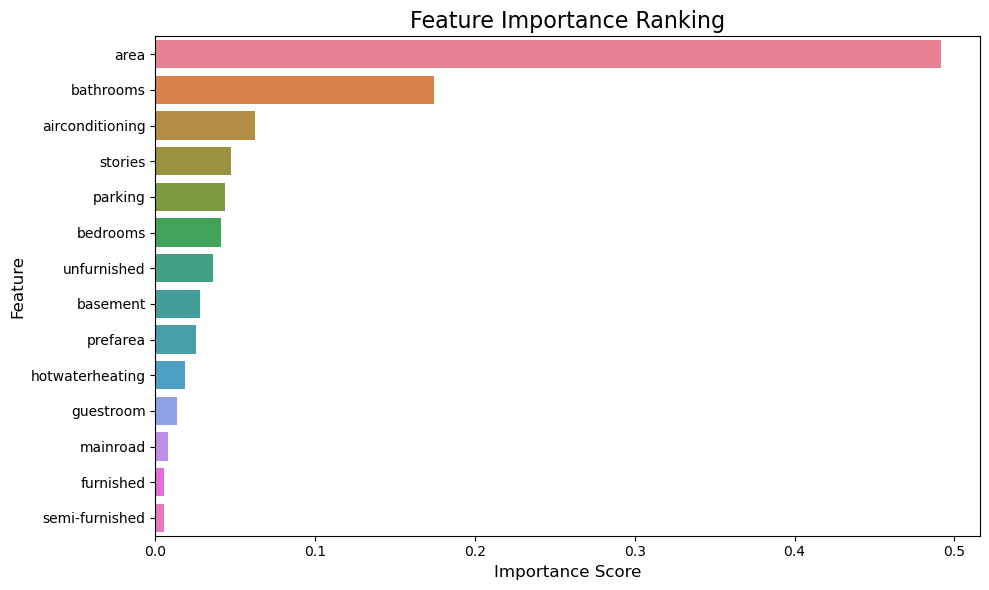

In [55]:
# Data: Feature names and their importance values
features = [
    'area', 'bathrooms', 'airconditioning', 'stories', 'parking',
    'bedrooms', 'unfurnished', 'basement', 'prefarea', 'hotwaterheating',
    'guestroom', 'mainroad', 'furnished', 'semi-furnished'
]
importances = [
    0.4914611308114635, 0.17462181627962742, 0.0626037319810901, 
    0.04736941434193568, 0.04339031398962685, 0.04095458449533414, 
    0.03607661624395147, 0.027629393352997113, 0.02556123278729428, 
    0.01830841214681987, 0.013519070477833852, 0.008186071294173003, 
    0.005219076964027147, 0.005099134833825632
]

# Create a DataFrame for visualization (optional)

dataaaaa = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort features by importance for better visualisation
dataaaaa = dataaaaa.sort_values(by='Importance', ascending=False)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dataaaaa, hue='Feature',legend=False)
plt.title('Feature Importance Ranking', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


From analyzing the features importance ranking, I can see that;
Area is the most significant feature: With an importance score of 49.15%, the area feature appears to have the strongest correlation with house prices in the dataset. It explains a substantial portion of the variance in the target variable.
Bathrooms and Air Conditioning: The second and third most important features are bathrooms (around 17.46%) and airconditioning (around 6.26%). These features also contribute meaningfully to the model.
Low Importance Features: Features like mainroad, furnished, and semi-furnished have very low importance scores (below 1%). This indicates that they have minimal impact on predicting house prices in this context. 

So I will be removing these 3 low important features in an attempt to improve the model

In [192]:
x6 = df_RFR.drop(columns=['price'])
y6 = df_RFR['price']

# Dropping low importance features
low_importance_features = ['mainroad', 'furnished', 'semi-furnished']
x_reduced = x6.drop(columns=low_importance_features)

# Split data
x6_train, x6_test, y6_train, y6_test = train_test_split(x_reduced, y6, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x6_train, y6_train)

# Make predictions
y6_pred = model.predict(x6_test)

# Evaluate the model
mse = mean_squared_error(y6_test, y6_pred)
r2 = r2_score(y6_test, y6_pred)
mae = mean_absolute_error(y6_test, y6_pred)

print(f"Model MSE: {mse}, R²: {r2}, MAE: {mae}")

Model MSE: 2015338051663.804, R²: 0.6012839957827796, MAE: 1044882.7559633028


MSE (Mean Squared Error): 2.02 trillion
This value indicates that the model is still making large errors, but a lower MSE compared to before suggests some improvement in prediction accuracy.
R² (Coefficient of Determination): 0.601
This means the model explains about 60.1% of the variance in house prices, which is a significant improvement from the previous R² score of around 15%. This indicates that the model is capturing more of the underlying patterns in the data.
MAE (Mean Absolute Error): 1,044,883 
This shows that, on average, My predictions are off by about 1 million in the price, which is still quite substantial.

To tune the hyperparameters to improve the model using GridSearch to automate the process

In [193]:
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Set up the grid search
grid_search1 = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search1.fit(x6_train, y6_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.6131575253358614


In [194]:
#using new params to predict and check metrics 
grid_model = grid_search1.best_estimator_
y6_pred_new = grid_model.predict(x6_test)

# Calculate metrics
mse = mean_squared_error(y6_test, y6_pred_new)
r_squared = r2_score(y6_test, y6_pred_new)
mae = mean_absolute_error(y6_test, y6_pred_new)

# Output metrics
print("Final Model MSE:", mse)
print("Final Model R²:", r_squared)
print("Final Model MAE:", mae)

Final Model MSE: 1952139205365.5952
Final Model R²: 0.6137873033278126
Final Model MAE: 1028924.8830182168


Final Model MSE (Mean Squared Error): 1,952,139,205,365.60

A lower MSE indicates that the model’s predictions are close to the actual values on average. In the context of the dataset, this suggests that the model is making relatively accurate predictions compared to the previous model
Final Model R² (R-squared): 0.614

This means that about 61.4% of the variance in house prices can be explained by the model. This is a good indicator that the model is capturing a significant amount of the underlying patterns in the data.

Final Model MAE (Mean Absolute Error): 1,028,924.88.
This metric represents the average absolute difference between the predicted and actual prices. An MAE of around 1 million suggests that, on average, the model's predictions deviate from the actual values by approximately 1 million in the unit of price data

### Random Forest Regressor  
But with Log transformations, also adding polynomial features and using all the full features (total rooms included)

In [195]:
# Confirm it is the dataframe 

df.head()

,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,price,area,furnished,unfurnished,total_rooms
0,3,1,0,0,1,2,1,16.403275,8.912069,1,0,6
1,4,1,0,0,1,3,0,16.321037,9.100637,1,0,8
2,2,1,1,0,0,2,1,16.321037,9.206433,0,0,5
3,2,1,1,0,1,3,1,16.318175,8.922792,1,0,6
4,2,1,1,0,1,2,0,16.250001,8.912069,1,0,6


I will be using a new pipeline to automate the process of scaling, adding the polyomial features and training the model , While using the GridSearch to find the best parameters and train the new model with it.

In [196]:
x7 = df.drop(columns='price',axis=1)
y7 = df['price'] 

x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=0.2, random_state=42) 

In [197]:
# Define new pipeline and the paramters to be tuned

pipeline = Pipeline([
    ('scaler', StandardScaler()),                   # Step 1: Feature Scaling
    ('poly', PolynomialFeatures(degree=2)),         # Step 2: Polynomial Features
    ('rf', RandomForestRegressor(random_state=42))  # Step 3: Random Forest Regressor
])

# Define parameter grid for Random Forest tuning using GridSearchCV
params_grid = {
    'poly__degree': [1,2, 3],  # Test polynomial degrees 1, 2 and 3
    'rf__n_estimators': [100, 200, 300],  # Number of trees
    'rf__max_depth': [None, 10, 20],      # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'rf__min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'rf__bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

grid_search2 = GridSearchCV(pipeline, params_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

grid_search2.fit(x7_train,y7_train) 

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'poly__degree': [1, 2, 3],
                         'rf__bootstrap': [True, False],
                         'rf__max_depth': [None, 10, 20],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

Time to get the best parameters and make a prediction using the best estimator

In [198]:
print(f"The best parameters from the extensive GridSearchCV: {grid_search2.best_params_}")

The best parameters from the extensive GridSearchCV: {'poly__degree': 3, 'rf__bootstrap': True, 'rf__max_depth': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}


The best parameters are polynomial features degree : 3, bootstrap: True, max_depth: None, min_samples_leaf: 4, min_samples_split: 2, n_estimators': 100

In [199]:
rf_grid_y_pred = grid_search2.best_estimator_.predict(x7_test)

# Evaluate the model
mse = mean_squared_error(y_test,rf_grid_y_pred )
r2 = r2_score(y_test, rf_grid_y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.07424869423262069
R-squared: 0.6154683474065361


After applying polynomial transformations, log transformation, scaling, and hyperparameter tuning on the Random Forest model, the resulting R-squared of 0.615 indicates that the model explains 61.5% of the variance in house prices. The Mean Squared Error (MSE) of 0.074 shows a reasonable fit but suggests there is still room for improvement.

### Random Forest Regressor  
But with Log transformations, adding polynomial features and using all the full features(total rooms not included) and minus the 3 low importamce features 
Using Pipeline and GridSearch to Automate the process

In [205]:
x8 = df_RFR.drop(columns=['price'])
y8 = df_RFR['price']

y8_log = np.log1p(y8)  # Apply log1p to price (target)
x8['area'] = np.log1p(x8['area'])  # Apply log1p to the area feature

# Dropping low importance features
low_importance_features = ['mainroad', 'furnished', 'semi-furnished']
xnew_reduced = x8.drop(columns=low_importance_features)

# Split data
x8_train, x8_test, y8_train, y8_test = train_test_split(xnew_reduced, y8_log, test_size=0.2, random_state=42)


pipeline2 = Pipeline([
    ('scaler', StandardScaler()),                   # Step 1: Feature Scaling
    ('poly', PolynomialFeatures(degree=2)),         # Step 2: Polynomial Features
    ('rf', RandomForestRegressor(random_state=42))  # Step 3: Random Forest Regressor
])

# Define parameter grid for Random Forest tuning using GridSearchCV
params_grid2 = {
    'poly__degree': [1,2, 3],  # Test polynomial degrees 1, 2 and 3
    'rf__n_estimators': [100, 200, 300],  # Number of trees
    'rf__max_depth': [None, 10, 20],      # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'rf__min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'rf__bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

grid_search2 = GridSearchCV(pipeline2, params_grid2, cv=5, scoring='r2', verbose=2, n_jobs=-1)

grid_search2.fit(x8_train,y8_train) 

print("Best Parameters: ", grid_search2.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters:  {'poly__degree': 1, 'rf__bootstrap': True, 'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}


The new best paramters for the new model are: poly__degree: 1, bootstrap: True, ': 10, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 100

In [206]:
# Make predictions and test the scores using the best estimator

new_pred = grid_search2.best_estimator_.predict(x8_test)

# Evaluate the model
new_mse = mean_squared_error(y8_test, new_pred)
new_r2 = r2_score(y8_test, new_pred)

print(f"Mean Squared Error: {new_mse}")
print(f"R-squared: {new_r2}")

Mean Squared Error: 0.07310671949821129
R-squared: 0.6213825986453074


After applying log transformations, polynomial features, and removing low-importance features (mainroad, furnished, and semi-furnished), the model achieved an R-squared of 0.621, explaining 62.1% of the variance in house prices. The Mean Squared Error (MSE) of 0.073 indicates a moderate level of error, suggesting the model's predictions are reasonably accurate but still have room for improvement. However, the residuals and unexplained variance suggest the potential for further improvement, possibly through more advanced feature engineering or trying different models.

### Step 8 

#### Conclusion 

At the end of this Machine Learning project, I was able to build a few models and evaluated their performances. 


| Models                                                                                      | Test MSE         | Test r² |
|---------------------------------------------------------------------------------------------|------------------|---------|
| Linear Regression                                                                           | 0.0698           | 0.1222  |
| Grid Search (ridge and polynomial features) with Log Transformations                        | 0.0704           | 0.6356  |
| Grid Search (ridge and polynomial features) without Log Transformations                     | 2.31051E+12      | 0.5429  |
| Grid Search (ridge and polynomial features) with all features but without Log Transformations| 1.76452E+12      | 0.6509  |
| Grid Search (ridge and polynomial features) with all features but with Log Transformations   | 0.062            | 0.679   |
| Random Forest Regressor without any log transformations and without scaling                 | 1.96061E+12      | 0.2434  |
| Random Forest Regressor without any log transformations and with hyperparameters tuning      | 2.0477E+12       | 0.1502  |
| Random Forest Regressor after removing least important features                             | 2.01534E+12      | 0.6013  |
| Random Forest Regressor after removing least important features and tuning hyperparameters   | 1.95214E+12      | 0.6138  |
| Random Forest Regressor with log transformations, scaling, polynomial features (all features)| 0.074248694      | 0.6155  |
| Random Forest Regressor with log transformations, scaling, polynomial features (reduced features)| 0.073106719      | 0.6214  |


Conclusion Report : 
This report summarizes the evaluation of various regression models applied to predict housing prices based on selected features. The models analyzed include linear regression, ridge regression with polynomial features, and random forest regressors with and without log transformations. The key performance metrics assessed were Mean Squared Error (MSE) and R-squared (r²) values, which provide insights into the models' predictive accuracy and overall fit.

Linear Regression produced a test MSE of 0.0698 and an R-squared of 0.1222, indicating poor predictive accuracy. The low R-squared suggests that this model could only explain about 12% of the variance in housing prices, making it an unreliable model for this dataset.

Grid Search with Ridge Regression and Polynomial Features without any log transformations had a very high test MSE of 2.31051E+12 and a poor R-squared of 0.5429, showing that without transformations, the ridge regression model was highly inaccurate.

Grid Search with Ridge Regression using Log Transformations for both the price and area features performed the best. It achieved a test MSE of 0.062 and a R-squared of 0.679, indicating that it captured the most variance in housing prices (about 68%) while maintaining a relatively low error.

Random Forest Regressor without Log Transformations generally performed poorly with very high MSE values (up to 2.0477E+12 in some configurations) and low R-squared values, suggesting that this model struggled with the complexity of the data when no transformations were applied.

Random Forest Regressor with Log Transformations, Scaling, and Polynomial Features, when using all features or even after reducing less important ones, improved performance (Test MSE around 0.0731 and R-squared around 0.6214). However, it still did not outperform the ridge regression with log transformations.

Final Verdict:
The best model is the Grid Search with Ridge Regression, using log transformations and polynomial features, achieving the lowest test MSE (0.062) and highest R-squared (0.679). This indicates that this model best captured the relationships in the data and provided the most accurate predictions for housing prices.

This analysis shows the importance of feature transformations, especially log transformations, in improving the performance of regression models on skewed data like housing prices. 
Future work could explore additional feature engineering techniques and alternative algorithms to further enhance model performance.

# Thank you for completing this project!!!! #

